In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
sys.path.append(os.path.abspath(".."))

In [3]:
from warnings import filterwarnings
from config import logger

In [4]:
filterwarnings("ignore")

logger = logger.setup_logger("EDA", "../logs/eda.log")

In [5]:
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        logger.info(f"Loaded data from {file_path}")
        return df
    except Exception as e:
        logger.error(f"Error loading data from {file_path}: {e}")
        return pd.DataFrame()

In [6]:
file_path = "../data/Walmart_Sales.csv"

df = load_data(file_path)


In [7]:
df.head()  # Display the first few rows of the DataFrame

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df.info()   # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.describe()  # Get summary statistics of the DataFrame

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
df.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
482,4,11-02-2011,2187847.29,1,33.29,3.033,127.859129,6.51


In [11]:
# how to read describe for outliers

## **Data Cleaning**

In [12]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
logger.info("Converting Date from object to Datetime")
try:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors= 'raise')
    logger.info(f"Conversion successful {df['Date'].dtype}")
except Exception as e:
    logger.error(f"Error converting Date column: {e}")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [16]:
df['Date'].isnull().any()

np.False_

In [17]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [18]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [32]:
df.drop('Date', axis=1, inplace=True)

In [33]:
df.to_csv("../data/processed_walmart_sales.csv", index=False)

## ***EDA Questions***

1. **Holiday Effect on Sales**

    - Do weekly sales significantly increase or decrease during holiday weeks compared to non-holiday weeks?

2. **Temperature Impact**

    - How do extreme weather conditions (very hot or very cold weeks) influence weekly sales performance?

3. **Fuel Price Relationship**

    - Is there any noticeable correlation between fuel prices and weekly sales? (Higher fuel cost → less shopping trips?)

4. **CPI vs. Sales**

    - Does inflation (CPI) affect consumer spending patterns in the store’s weekly sales?

5. **Unemployment vs. Sales**

    - How does the unemployment rate in the region affect store sales over time?

6. **Trend Analysis**

    - What is the general trend of sales over time (increasing, decreasing, or seasonal)?

7. **Holiday-Specific Performance**

    - Which holidays (e.g., Thanksgiving, Christmas, etc., if identifiable from dates) contribute most to peak sales?

8. **Store-Specific Patterns (if multiple stores exist in full dataset)**

    - Do different stores show different sensitivities to fuel price, CPI, or unemployment?

9. **Sales Volatility**

    - Which factor (Temperature, Fuel Price, CPI, or Unemployment) explains the largest fluctuations in sales?

10. **Best & Worst Weeks**

    - What are the top 5 and bottom 5 weeks in terms of sales, and what external factors (holiday, economy, weather) explain those outcomes?

In [19]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [27]:
avearge_holy = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().round()

In [29]:
avearge_holy

Holiday_Flag
0    1041256.0
1    1122888.0
Name: Weekly_Sales, dtype: float64

In [22]:
def human_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}k'
    else:
        return f'{x:.0f}'


In [23]:
import matplotlib.ticker as ticker

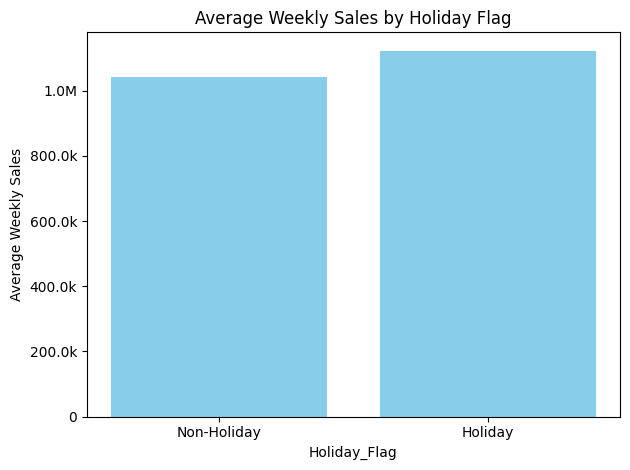

In [31]:
plt.bar(avearge_holy.index, avearge_holy.values, color='skyblue')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xlabel('Holiday_Flag')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Holiday Flag')
plt.xticks(avearge_holy.index, ['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()